### 목표
- 결측치와 이상치를 확인, 처리하고 시각화하라.
- 히스토그램, 박스 플롯 등으로 시각화하라.
- 가장 많이 평가된 영화, 가장 높은 평균 평점을 받은 영화 등의 리스트를 확인하라.
- 시간에 따른 평점의 변화나 패턴을 라인 플롯으로 확인하라

### 사용 가능 라이브러리
- numpy
- pandas
- matplotlib
- seaborn

#### NumPy

- 다차원 배열 제공
- 배열 기반의 브로드 캐스팅
- 수학 함수 및 선형 대수, 푸리에 변환 기능 제공

> 푸리에 변환

- 특정 신호를 주파수 영역으로 변환하는 것.
- 어떤 복잡한 신호라도 여러 종류의 sin, cos의 합으로 변환할수 있다.

#### Pandas

- NumPy를 기반으로 만들어진 라이브러리
- 데이터 분석 및 조작을 위한 자료구조: Series, DataFrame
- 데이터 정제, 변환 분석, 시각화 제공

#### Matplotlib

- 다양한 유형의 그래프 및 차트 생성, 선 그래프, 산점도, 막대 그래프, 히스토그램
- pyplot: MATLAB 스타일의 인터페이스 제공.

#### Seaborn

- Matplotlib 기반의 시각화 라이브러리
- Pandas DataFrame과 연동이 용이함

In [56]:
import pandas as pd

file_names = [
    'castings.csv',
    'countries.csv',
    'genres.csv',
    'rates.csv',
    'movies.txt',
    'peoples.txt',
]

names = [file_name.split('.')[0] for file_name in file_names]

data_list = dict()

def get_dataset_from_file(path: str, sep: str = ','):
  extension = path.split('.')[-1]
  if extension == "csv":
    return pd.read_csv(path, sep=sep, on_bad_lines='skip')
  elif extension == "txt":
    return pd.read_csv(path, sep='\t', on_bad_lines='skip')

for idx, file_name in enumerate(file_names):
  file_path = f"./kmrd-small/{file_name}"
  name = names[idx]
  data_list[name] = get_dataset_from_file(file_path)
  print(f"\n\n--- {name} ---\n")
  print(data_list[name].info())
  print(f"데이터 필드:\n{data_list[name].columns.tolist()}")
  print(f"데이터 구성:\n{data_list[name].head(1)}")
  print(f"데이터 수: {len(data_list[name])}")



--- castings ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB
None
데이터 필드:
['movie', 'people', 'order', 'leading']
데이터 구성:
   movie  people  order  leading
0  10001    4374      1        1
데이터 수: 9776


--- countries ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB
None
데이터 필드:
['movie', 'country']
데이터 구성:
   movie country
0  10001    이탈리아
데이터 수: 1109


--- genres ---

<class 'pandas.core.frame.DataFrame'>
RangeInde

In [57]:
import re

def split_and_eleminate_by_char(item_set: set, seperator: str) -> set:
    result = set()
    pattern = f"[{re.escape(seperator)}]+"
    for item in item_set:
        list_in_item = re.split(pattern, item)
        result.update(set(list_in_item))
    return result

In [58]:
print(f"사용자 수: {len(set(data_list['rates']['user']))}")
print(f"영화 수: {len(set(data_list['movies']['movie']))}")
print(f"평점 수: {len(data_list['rates'])}")
print(f"제작국가 수: {len(set(data_list['countries']['country']))}")
print(f"출연진 수: {len(set(data_list['peoples']['people']))}")
print(f"장르 수: {len(pd.Series(data_list['genres']['genre'].str.split('/').sum()).unique())}\n\n")

print(f"사용자 수: {len(data_list['rates']['user'].unique())}")
print(f"영화 수: {len(data_list['movies']['movie'].unique())}")
print(f"평점 수: {len(data_list['rates'])}")
print(f"제작국가 수: {len(data_list['countries']['country'].unique())}")
print(f"출연진 수: {len(data_list['peoples']['people'].unique())}")
print(f"장르 수: {len(split_and_eleminate_by_char(set(data_list['genres']['genre']), '/'))}")


사용자 수: 52028
영화 수: 999
평점 수: 140710
제작국가 수: 36
출연진 수: 7172
장르 수: 21


사용자 수: 52028
영화 수: 999
평점 수: 140710
제작국가 수: 36
출연진 수: 7172
장르 수: 21


- 데이터에 결측치와 이상치가 있는지 확인, 처리
- 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯으로 시각화하기

#### 결측치와 이상치
> 결측치
- 데이터셋에서 특정 값이 누락된 것을 의미
- 수집오류, 입력 실수, 의도적 누락, 병합 오류..
- 종류
  - MCAR(Missing Completely at Random)
    결측치 발생이 완전히 무작위적이며 다른 변수나 값과 관계 없음
  - MAR(Missing at Random)
    결측치 발생이 특정 변수와는 관련 있지만 관측되지 않은 값과는 무관함
  - MNAR(Missing Not at Random)
    결측치 발생이 데이터 자체의 특성과 관련됨.

> 이상치
- 비상식적으로 크거나 작은 값. 동떨어진 값.
- 입력, 시스템 오류, 자연스러운 변동
- 종류
  - 극단치, 고립된 이상치, Multivariate 이상치

- Z-score
  - Z = (X - μ) / σ , μ: 평균, σ: 표준편차
  - 데이터를 표준화하여 평균으로부터 얼마나 떨어져 있는지를 측정하는 방법
  - 일반적으로 Z-score의 절댓값이 3을 초과하는 값을 이상치로 간주
  - 장점
    - 간단하고 직관적
  - 단점
    - 정규분포 가정. 특이점에 민감

- IQR
  - 데이터의 중앙값을 기준으로 상하 사분위수(25, 75%) 그 사이의 범위를 구함
  - IQR의 1.5배를 기준으로 이상치의 범위를 결정
  - 장점
    - 정규분포 가정 필요 없음. 특이값에 둔감
  - 단점
    - 데이터 분포가 비대칭일 경우 효과 떨어짐
  
- 도메인 지식 기반
  - 데이터의 특성과 의미를 고려하여 이상치를 판단하는 방법
  - Ex) 사람의 키 음수, 10점 초과의 영화 별점...



#### 어떤 값이 이상치 제거에 어울릴까?

- 평가 수: 경우에 따라서 적은 사용자들의 평점을 가지고 있는 영화는 신뢰도가 낮을 수 있다. Ex) 1명의 5점 vs 10만명의 4.5점
- 평점: 극단적인 평점. 범위 밖의 평점. 
- 타임스탬프: 미래의 시점과 너무 과거의 시점인 경우.

- 도메인 지식 기반 제거 => 평가 

#### 목표
- 가장 많이 평가된 영화, 가장 높은 평균 평점을 받은 영화 등의 리스트를 확인하라.
- 시간에 따른 평점의 변화나 패턴을 라인 플롯으로 확인하라

> 진행 방향

- 결측치를 0으로 채운다.
- rates df에서 0 이하, 10 초과의 점수 행의 이상치를 제거한다.
- 가장 많이 평가된 영화와 가장 높은 평균 평점을 받은 영화를 확인한다.

In [59]:
# 결측치 제거
data_list_dropna = dict()
for name in names:
  data_list_dropna[name] = data_list[name].dropna()
  
# 결측치 채우기
data_list_fillna = dict()
for name in names:
  data_list_fillna[name] = data_list[name].fillna(0)

# 이상치 제거 - Z-score
df = data_list['rates']

def eliminate_outliers_zscore(df, column, threshold=3):
  mean = df[column].mean()
  std = df[column].std()
  df['z_score'] = (df[column] - mean) / std
  result = df[df['z_score'].abs() < threshold]
  return result

res_zscore = eliminate_outliers_zscore(df, "rate")


# 이상치 제거 - IQR
def eliminate_outliers_iqr(df, column):
  Q1 = df['rate'].quantile(0.25)
  Q3 = df['rate'].quantile(0.75)
  IQR = Q3 - Q1
  
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  return df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

res_iqr = eliminate_outliers_iqr(df, "rate")
print(f"rates len: {len(df)}, zscore len: {len(res_zscore)}, iqr len: {len(res_iqr)}")

rates len: 140710, zscore len: 134740, iqr len: 120609


In [ ]:
df_rates = data_list_fillna["rates"]

df_rates = df_rates[(df_rates['rate'] >= 1) & (df_rates['rate'] <= 10)]

# Convert 'time' to datetime for time-based analysis
df_rates['time'] = pd.to_datetime(df_rates['time'], unit='s')

# Group by time and calculate average rating for each time period
time_based_ratings = df_rates.groupby('time')['rate'].mean()


가장 많은 평가를 받은 영화: 10200
     movie         title                          title_eng    year    grade
199  10200  터미네이터 2:오리지널  Terminator 2: Judgment Day , 1991  2019.0  15세 관람가
가장 높은 평균 점수를 받은 영화: 10180
     movie         title            title_eng    year grade
179  10180  대통령을 만드는 사람들  Favorite Son , 1988  1988.0   NaN


In [ ]:
def print_movie_by_id(ids: list):
    for id in ids:
        print(df_movies[df_movies['movie'] == id])



movie_counts = df_rates['movie'].value_counts()
movie_rates = df_rates.groupby('movie')['rate'].mean()
max_count = movie_counts.max()
max_rate = movie_rates.max()

# Most evaluated movie ID (movie with the highest number of ratings)
most_evaluated_movie = movie_counts[movie_counts == max_count].index.tolist()

# Highest average rating movie ID
highest_avg_rating_movie = movie_rates[movie_rates == max_rate].index.tolist()

df_movies = data_list["movies"]
print(f"--------- 가장 많은 평가를 받은 영화: {most_evaluated_movie} ---------")
print_movie_by_id(most_evaluated_movie)
print(f"--------- 가장 높은 평균 점수를 받은 영화: {highest_avg_rating_movie} ---------")
print_movie_by_id(highest_avg_rating_movie)

가장 많은 평가를 받은 영화: [10200]
     movie         title                          title_eng    year    grade
199  10200  터미네이터 2:오리지널  Terminator 2: Judgment Day , 1991  2019.0  15세 관람가
가장 높은 평균 점수를 받은 영화: [10180, 10384, 10510, 10518, 10799, 10895, 10937, 10974]
     movie         title            title_eng    year grade
179  10180  대통령을 만드는 사람들  Favorite Son , 1988  1988.0   NaN
     movie title           title_eng    year grade
383  10384    여로  The Journey , 1959  1959.0    NR
     movie title    title_eng    year   grade
509  10510  성춘향전  成春香傳 , 1976  1976.0  전체 관람가
     movie title  title_eng    year     grade
517  10518    비황  秘煌 , 1992  1992.0  청소년 관람불가
     movie    title      title_eng    year   grade
798  10799  내 친구 제제  내친구 제제 , 1989  1989.0  전체 관람가
     movie   title         title_eng    year     grade
894  10895  피부 깊숙이  Skin Deep , 1989  1989.0  청소년 관람불가
     movie   title title_eng    year     grade
936  10937  위기의 여자      1987  1987.0  청소년 관람불가
     movie title                

In [61]:

print(f"사용자 수: {len(data_list_dropna['rates']['user'].unique())}")
print(f"영화 수: {len(data_list_dropna['movies']['movie'].unique())}")
print(f"평점 수: {len(data_list_dropna['rates'])}")
print(f"제작국가 수: {len(data_list_dropna['countries']['country'].unique())}")
print(f"출연진 수: {len(data_list_dropna['peoples']['people'].unique())}")
print(f"장르 수: {len(split_and_eleminate_by_char(set(data_list_dropna['genres']['genre']), '/'))}\n\n")


print(f"사용자 수: {len(data_list['rates']['user'].unique())}")
print(f"영화 수: {len(data_list['movies']['movie'].unique())}")
print(f"평점 수: {len(data_list['rates'])}")
print(f"제작국가 수: {len(data_list['countries']['country'].unique())}")
print(f"출연진 수: {len(data_list['peoples']['people'].unique())}")
print(f"장르 수: {len(split_and_eleminate_by_char(set(data_list['genres']['genre']), '/'))}")

사용자 수: 52028
영화 수: 599
평점 수: 140710
제작국가 수: 36
출연진 수: 6305
장르 수: 21


사용자 수: 52028
영화 수: 999
평점 수: 140710
제작국가 수: 36
출연진 수: 7172
장르 수: 21


In [62]:
print(time_based_ratings)

time
2003-11-20 15:00:00     9.0
2003-11-21 15:00:00     9.2
2003-11-22 15:00:00     9.5
2003-11-23 15:00:00     9.0
2003-11-24 15:00:00    10.0
                       ... 
2019-12-16 14:35:00    10.0
2019-12-16 15:44:00    10.0
2019-12-16 16:59:00    10.0
2019-12-16 19:15:00    10.0
2019-12-16 19:51:00    10.0
Name: rate, Length: 136972, dtype: float64


그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.


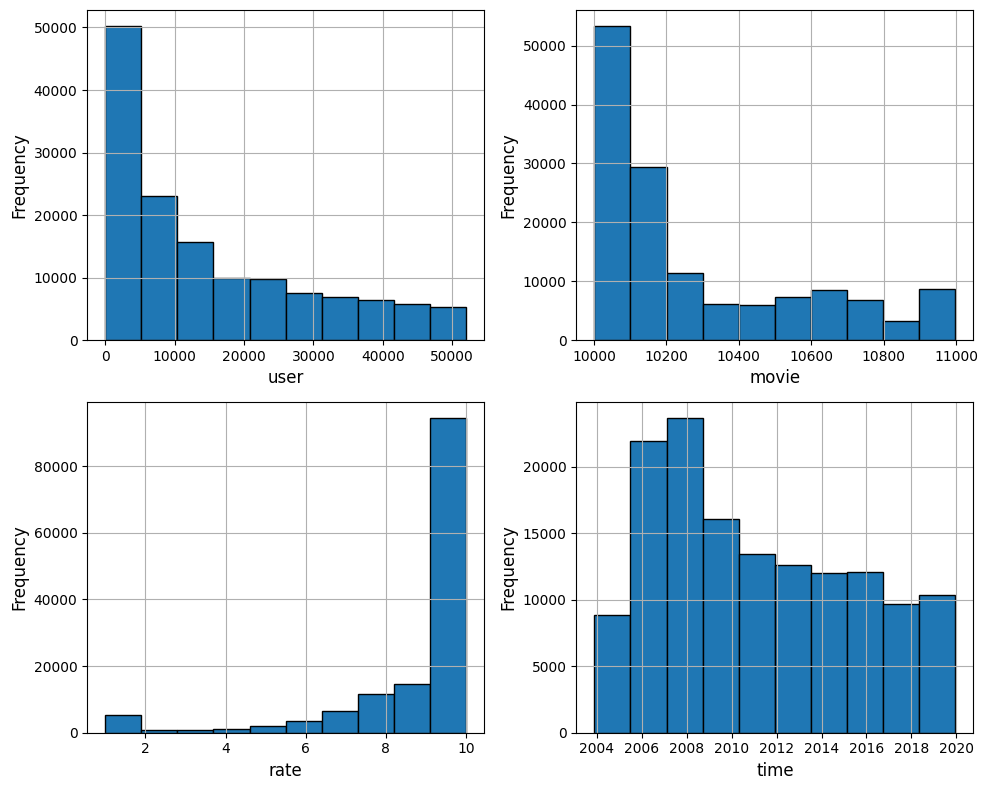

그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.


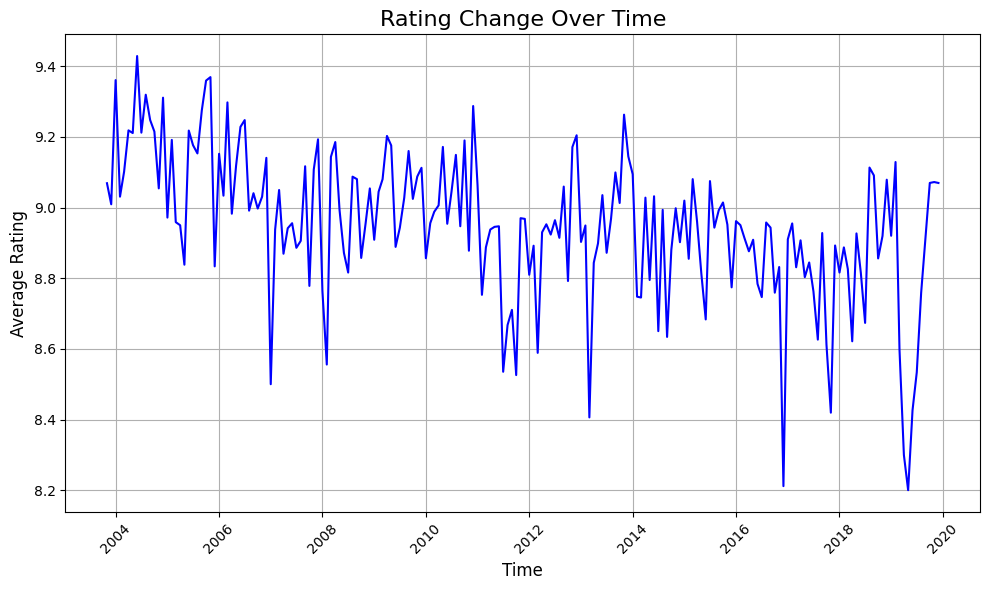

In [112]:
import matplotlib.pyplot as plt

df_movies = data_list_fillna["movies"]
df_rates = data_list_fillna["rates"]
def get_movie_id_by_name(name: str):
    try: 
        result = df_movies[df_movies["title"] == name].reset_index(drop=True)
        if not result.empty:
            return result.loc[0, 'movie']
        else:
            return None
    except:
        return None


def get_boxplot_by_moviename(name:str):
    movie_id = get_movie_id_by_name(name)
    if movie_id:
        print(movie_id)
        df = df_rates[df_rates["movie"] == movie_id]
    else:
        print("그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.")
        df = df_rates
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    column = df.columns
    for i in range(2):
        for j in range(2):
            axes[i, j].hist(df[column[i * 2 + j]], bins=10, edgecolor='black')
            axes[i, j].set_xlabel(column[i * 2 + j], fontsize=12)
            axes[i, j].set_ylabel('Frequency', fontsize=12)
            axes[i, j].grid(True)

    plt.tight_layout()
    plt.show()



def get_plot_by_moviename_timebased(name: str):
    movie_id = get_movie_id_by_name(name)
    if movie_id:
        print(movie_id)
        df = df_rates[df_rates["movie"] == movie_id]
    else:
        print("그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.")
        df = df_rates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    monthly_avg_rating = df.groupby(df['time'].dt.to_period('M'))['rate'].mean()
    # Plot time-based ratings change
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_rating.index.to_timestamp(), monthly_avg_rating.values, marker='', linestyle='-', color='b')
    plt.title('Rating Change Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

title = input("영화 제목을 입력해주세요")
get_boxplot_by_moviename(title)
get_plot_by_moviename_timebased(title)


